# Assignment 2

In this assignment, you will be building a SVM classifier to label famous people's images.

## Dataset
You will use the labeled faces in the Wild dataset which consists of several thousand collated photos of the various public figures.

In [1]:
from sklearn.datasets import fetch_lfw_people

def load_data():
    faces = fetch_lfw_people(min_faces_per_person=60)
    print('data loaded')
    print(faces.target_names)
    print(faces.images.shape)
    return faces

In [2]:
data = load_data()

data loaded
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


## Requirements
Each image contains [62x47] or nearly 3,000 pixels. Use each pixel value as a feature. You will use RandomizedPCA to extract 150 fundamental components to feed into your SVM model as a single pipeline.

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### 1. Split the data into a training and testing set

In [4]:
from sklearn.model_selection import train_test_split\

# Test size = 25%, Training size = 75%
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)

### 2. Use a grid search cross-validation to explore combinations of parameters to determine the best model:

C: margin hardness E.g. [1, 5, 10, 50] <br>
gamma: radial basis function kernel E.g. [0.0001, 0.0005, 0.001, 0.005]

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid).fit(X_train, y_train)

print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [6]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### 3. Draw a 4x6 subplots of images using names as label with color black for correct instances and red for incorrect instances.

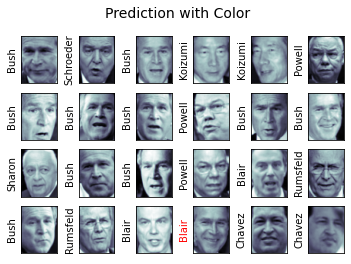

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(data.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Prediction with Color', size=14);

### 4. Draw a confusion matrix between features in a heatmap with X-axis of 'Actual' and Y-axis of 'Predicted'.

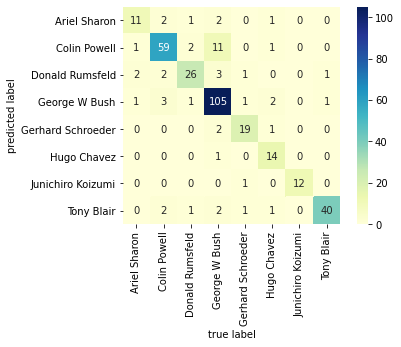

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');